<h1><b>Importing Libraries</h1>

In [ ]:
%load_ext cuml.accel

cuML: Accelerator installed.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, precision_score, recall_score
from scipy.stats import randint
import pandas as pd
import gc

<h1><b>Training the Model

In [ ]:
X = pd.read_parquet('X_processed.parquet')
y = pd.read_parquet('y_processed.parquet')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

del X, y
gc.collect()

0

In [ ]:
dt = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)

param_dist = {
    'max_depth': [5, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

<h5><b> Applying Hyperparameter Tuning using Randmoize Search CV

In [ ]:
dt_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=2,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

print("Running hyperparameter search for Decision Tree...")
dt_search.fit(X_train, y_train)

print("\nBest Parameters:", dt_search.best_params_)
print("Best CV ROC-AUC:", dt_search.best_score_)

Running hyperparameter search for Decision Tree...
Fitting 2 folds for each of 20 candidates, totalling 40 fits

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Best CV ROC-AUC: 0.8303019600669159


<h1><b> Testing the Model

In [ ]:
best_dt = dt_search.best_estimator_
y_pred = best_dt.predict(X_test)
y_proba = best_dt.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("ROC-AUC Score : ", roc_auc)
print("F1 Score : ", f1)
print("Accuracy : ", accuracy)
print("Precision : ", precision)
print("Recall : ", recall)

ROC-AUC Score :  0.8422501559917137
F1 Score :  0.2556730856161287
Accuracy :  0.8605852270802994
Precision :  0.15720718216687976
Recall :  0.684248729736269


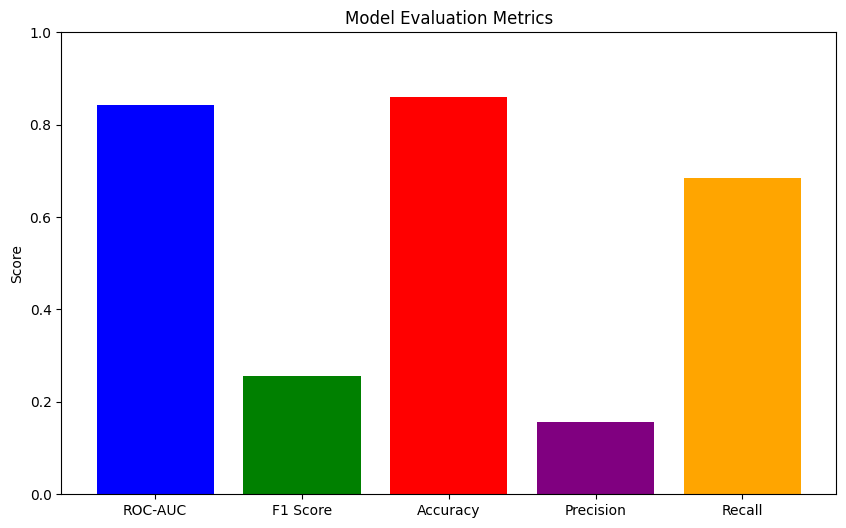

In [ ]:
import matplotlib.pyplot as plt

metrics = {
    'ROC-AUC': roc_auc,
    'F1 Score': f1,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
}

metric_names = list(metrics.keys())
metric_values = list(metrics.values())

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()